<a href="https://colab.research.google.com/github/Jocelyn-Garcia4rt/Graficas_INEGI/blob/main/DatosRecabadosdelaEncuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El tema de interes en la encuesta realizada fue de la musica se penso en usar datos cuantitativos para que nuestros datos permitan identificar patrones, relaciones y tendencias.

Saving Encuesta 8.xlsx to Encuesta 8 (2).xlsx


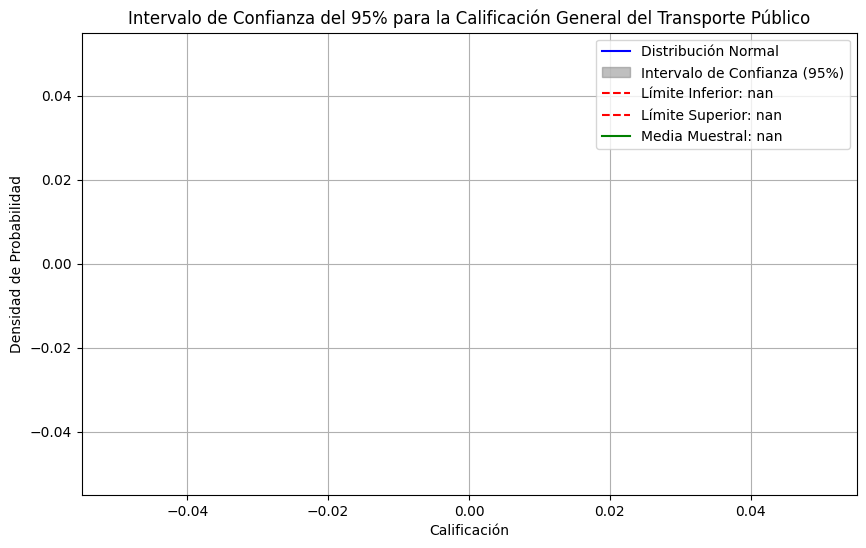

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from google.colab import files

media_muestral = 75
desviacion_estandar = 10
tamano_muestra = 30
nivel_confianza = 0.95
valor_z = 1.96 # Para un nivel de confianza del 95%

# Subir el archivo manualmente
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)

# Limpiar los nombres de las columnas para evitar errores
df.columns = df.columns.str.strip()

# Seleccionar la última columna (calificación general del servicio)
columna_calificacion = df.columns[-1]

# Convertir a valores numéricos
df[columna_calificacion] = pd.to_numeric(df[columna_calificacion], errors='coerce')

# Calcular estadísticos
media_muestral = df[columna_calificacion].mean()
desviacion_estandar = df[columna_calificacion].std()
tamano_muestra = df[columna_calificacion].count()
nivel_confianza = 0.95
valor_z = 1.96  # Para un nivel de confianza del 95%

# Calcular el error estándar y los límites del intervalo de confianza
error_estandar = desviacion_estandar / np.sqrt(tamano_muestra)
margen_error = valor_z * error_estandar
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Crear un rango de valores para la distribución normal
x = np.linspace(media_muestral - 4 * desviacion_estandar, media_muestral + 4 * desviacion_estandar, 1000)
y = norm.pdf(x, media_muestral, error_estandar)

# Graficar la distribución y el intervalo de confianza
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución Normal', color='blue')
plt.fill_between(x, y, where=(x >= limite_inferior) & (x <= limite_superior), color='gray', alpha=0.5,
                 label='Intervalo de Confianza (95%)')
plt.axvline(x=limite_inferior, color='red', linestyle='--', label=f'Límite Inferior: {limite_inferior:.2f}')
plt.axvline(x=limite_superior, color='red', linestyle='--', label=f'Límite Superior: {limite_superior:.2f}')
plt.axvline(x=media_muestral, color='green', linestyle='-', label=f'Media Muestral: {media_muestral:.2f}')

# Configurar etiquetas y título
plt.title('Intervalo de Confianza del 95% para la Calificación General del Transporte Público')
plt.xlabel('Calificación')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

El motivo de esta encuesta es

